<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary" data-toc-modified-id="Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning – Energy Systems Course at University of Calgary</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Energy-Efficiency-Dataset" data-toc-modified-id="Energy-Efficiency-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Energy Efficiency Dataset</a></span></li><li><span><a href="#Look-at-Dataset" data-toc-modified-id="Look-at-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Look at Dataset</a></span></li><li><span><a href="#Training-a-Binary-Classifier" data-toc-modified-id="Training-a-Binary-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training a Binary Classifier</a></span></li><li><span><a href="#Performance-Measures" data-toc-modified-id="Performance-Measures-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Performance Measures</a></span><ul class="toc-item"><li><span><a href="#Measuring-Accuracy-Using-Cross-Validation" data-toc-modified-id="Measuring-Accuracy-Using-Cross-Validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Measuring Accuracy Using Cross-Validation</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#Precision-and-Recall-(Sensitivity)" data-toc-modified-id="Precision-and-Recall-(Sensitivity)-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Precision and Recall (Sensitivity)</a></span></li></ul></li></ul></li><li><span><a href="#Multiclass-Classification" data-toc-modified-id="Multiclass-Classification-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiclass Classification</a></span><ul class="toc-item"><li><span><a href="#Error-Analysis-for-Multiclass-Classification" data-toc-modified-id="Error-Analysis-for-Multiclass-Classification-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Error Analysis for Multiclass Classification</a></span></li></ul></li></ul></div>

# Machine Learning – Energy Systems Course at University of Calgary

* Instructor: [Mehdi Rezvandehy](https://www.linkedin.com/in/mehdi-rezvandehy-ph-d-70a40b52/)

# Classification

In first lecture, we discussed about regression (predictive values) and classification (predictive classes) as the most common supervised learning approaches. In last lecture, a regression task was explored, predicting oil production using simple Linear Regression and Decision Trees (will be discussed in details). In this lecture, we will discuss about classification.

# Energy Efficiency Dataset

You can find different real datasets on the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets.php) which are processed and cleaned before and ready to feed Machine Learning algorithms. I found [Energy Efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) useful for this course. Energy analysis are performed for 768 simulated building shapes with respect to 8 features including Wall Area, Overall Height, Glazing Area, Orientation.. to predict Heating Load and Cooling Load. The work has been published by Tsanas and Xifara 2012 on [Energy and Buildings Journal](https://www.sciencedirect.com/science/article/pii/S037877881200151X). The dataset can be used for both regression and classification. In this lecture, we will apply binary classification on Heating Load that is the amount of heating that a building needs in order to maintain the indoor temperature at established levels. I added two columns to the dataset:  Heating Load is divided into binary and multiclasses. Lets look at the dataset.

# Look at Dataset

In [1]:
import pandas as pd

df = pd.read_csv('./Data/Building_Heating_Load.csv',na_values=['NA','?',' '])
df[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Binary Classes,Multi-Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Low Level,Level 2
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Low Level,Level 2
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Low Level,Level 2
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Low Level,Level 2
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Low Level,Level 2


info() function shows that there is no missing values in dataset.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Binary Classes             768 non-null    object 
 10  Multi-Classes              768 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 66.1+ KB


**value_counts()** function gives number of each class in the data set.

In [3]:
counts=df['Binary Classes'].value_counts()
counts/len(df['Binary Classes'])

Low Level     0.799479
High Level    0.200521
Name: Binary Classes, dtype: float64

In [4]:
gb_mean=df.groupby('Binary Classes')['Heating Load'].mean()
gb_mean

Binary Classes
High Level    37.124740
Low Level     18.590749
Name: Heating Load, dtype: float64

In [5]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [6]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000


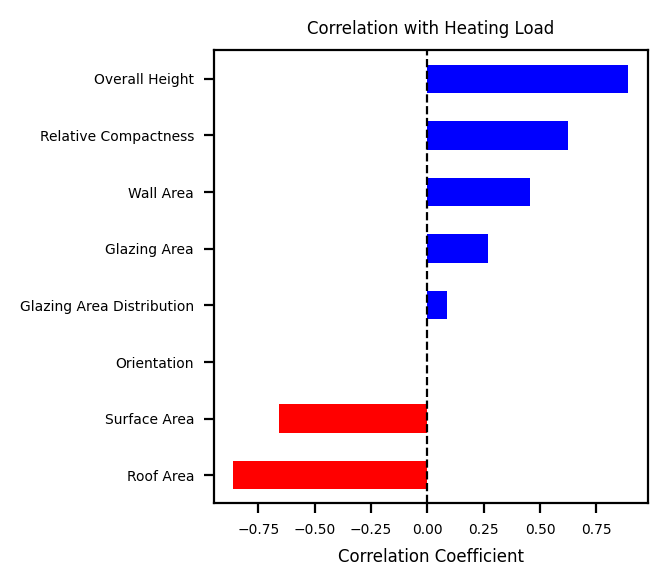

In [7]:
def corr_bar(df,title):
    """Plot correlation bar with the pair of atrribute with last column"""
    corr=df.corr()
    Colms_sh=list(list(corr.columns))
    coefs=corr.values[:,-1][:-1]
    names=Colms_sh[:-1]
    r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0  }, index = names )
    r_ = r_.sort_values(by=['coef'])
    r_['coef'].plot(kind='barh', color=r_['positive'].map({True: 'b', False: 'r'}))
    plt.xlabel('Correlation Coefficient',fontsize=6)
    plt.vlines(x=0,ymin=-0.5, ymax=10, color = 'k',linewidth=0.8,linestyle="dashed")
    plt.title(title)
    plt.show()
# 
import matplotlib
import pylab as plt

font = {'size'   : 5}
matplotlib.rc('font', **font)
ax1,fig = plt.subplots(figsize=(2.8, 3), dpi= 200, facecolor='w', edgecolor='k')

# Plot correlations of attributes with the last column
corr_bar(df,title='Correlation with Heating Load') 


# Training a Binary Classifier 

For now, we want to simplify the problem and go with the binary classification, so, Heating Load and MultiClasses columns should be removed.

In [8]:
df_binary=df.copy()
df_binary.drop(['Heating Load','Multi-Classes'], axis=1, inplace=True)
df_binary[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Binary Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Low Level
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Low Level
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Low Level
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Low Level
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Low Level


We should convert text labels Low Level and High Level to numbers. Since there are only two categories, we can simply concert Low Level to 0 and High Level to 1 using Pandas **replace()** function.  

In [9]:
df_binary['Binary Classes']=df_binary['Binary Classes'].replace('Low Level', 0)
df_binary['Binary Classes']=df_binary['Binary Classes'].replace('High Level', 1)
df_binary[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Binary Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0


Shuffle the data to avoid any element of bias/patterns in the split datasets. Some learning algorithms are very sensitive to the order of the training data, and they perform very bad if they get many similar instances in a row. Shuffling makes sure that this does not occur.

In [10]:
import numpy as np

np.random.seed(32) 
df_binary=df_binary.reindex(np.random.permutation(df_binary.index))
df_binary.reset_index(inplace=True, drop=True)
df_binary[0:10]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Binary Classes
0,0.79,637.0,343.0,147.00,7.0,4,0.40,3,1
1,0.76,661.5,416.5,122.50,7.0,5,0.40,4,1
2,0.76,661.5,416.5,122.50,7.0,3,0.25,4,1
3,0.66,759.5,318.5,220.50,3.5,3,0.40,1,0
4,0.98,514.5,294.0,110.25,7.0,5,0.10,2,0
5,0.79,637.0,343.0,147.00,7.0,3,0.25,2,1
6,0.79,637.0,343.0,147.00,7.0,2,0.40,2,1
7,0.64,784.0,343.0,220.50,3.5,3,0.00,0,0
8,0.62,808.5,367.5,220.50,3.5,4,0.10,4,0
9,0.71,710.5,269.5,220.50,3.5,4,0.10,3,0


Make a histogram of all features

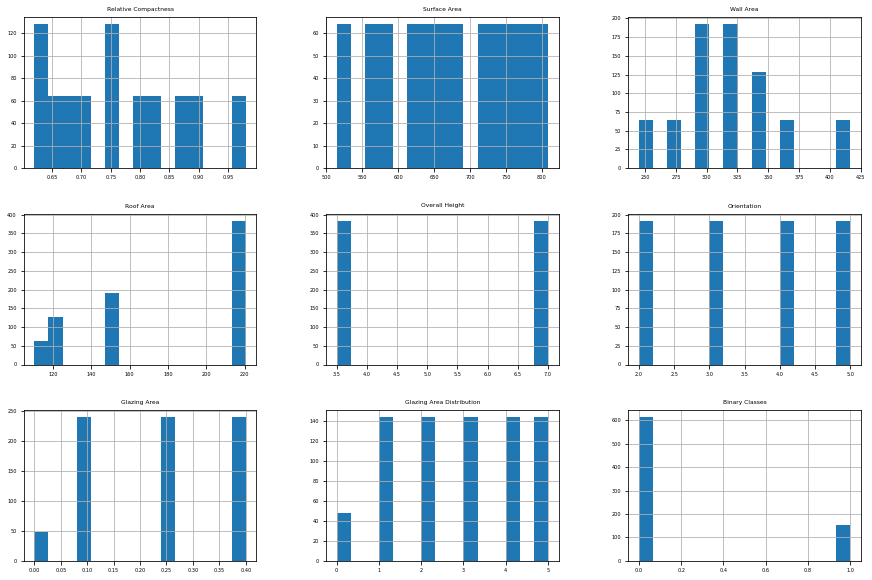

In [11]:
import matplotlib
import pylab as plt
df_binary.hist(bins=15, layout=(3, 3), figsize=(15,10))
plt.show()

**Wait! You should always set aside a test data before looking at the data set closely.** We should use stratified sampling based on the "Binary" category by Scikit-Learn’s *StratifiedShuffleSplit* function to have The same number of class for both training and test set.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spt.split(df_binary, df_binary['Binary Classes']):
    train_set_strat = df_binary.loc[train_idx]
    test_set_strat  = df_binary.loc[test_idx]  

Plot histogram of 'Binary Classes' to make sure we have selected a balanced number of classes for each data set.

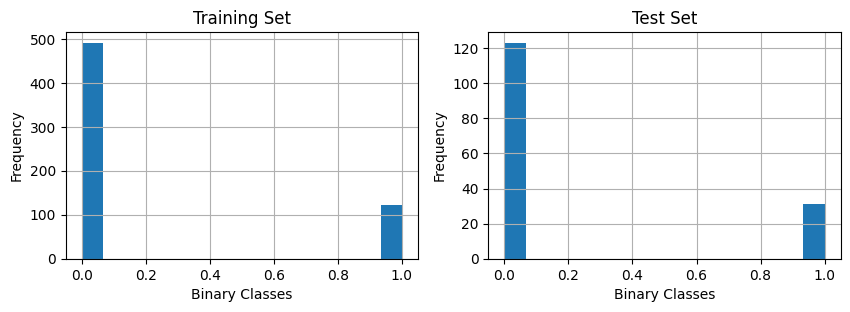

In [13]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1)
train_set_strat['Binary Classes'].hist(bins=15)
plt.title("Training Set")
plt.xlabel("Binary Classes")
plt.ylabel("Frequency")

ax2=plt.subplot(1,2,2) 
test_set_strat['Binary Classes'].hist(bins=15)
plt.title("Test Set")
plt.xlabel("Binary Classes")
plt.ylabel("Frequency")
plt.show()

Now you should remove the column Binary Classes and have a copy of it as target.

In [14]:
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("Binary Classes", axis=1)
y_train = train_set_strat["Binary Classes"].values

Next is to standardize your training data. Be careful, **you should not scale/standardize categorical variables and target.**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=X_train.copy()
X_train_Std=scaler.fit_transform(X_train)
# Traning Data
X_train_Std[0:5]

array([[ 2.00399847, -1.76197447, -0.55654271, -1.45169996,  1.        ,
        -0.45187215, -1.76353776, -1.81691156],
       [-0.05065135, -0.10607805,  2.23983391, -1.18233043,  1.        ,
        -1.34399272,  0.10919172,  0.7669534 ],
       [-0.05065135, -0.10607805,  2.23983391, -1.18233043,  1.        ,
         0.44024843, -1.01444597, -0.52497908],
       [ 0.88328039, -0.93402626, -0.55654271, -0.64359137,  1.        ,
        -1.34399272,  0.10919172,  0.7669534 ],
       [-0.98458308,  0.99785289,  0.00273262,  0.97262581, -1.        ,
         0.44024843, -1.01444597,  0.12098716]])

In [16]:
# Target values
y_train[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

Okay, the data is ready to feed Machine Learning. Lets choose a simple classifier and train it. Stochastic Gradient Descent (SGD) classifier is a good place to start. This classifier is efficiently capable of handling very large datasets since SGD deals with training instances one at a time not all of them for each iteration. We will talk about SGD in details in next lecture. The following code applies SGD with Scikit-Learn’s **SGDClassifier** function for the prepared dataset:

In [17]:
from sklearn.linear_model import SGDClassifier

# Call SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train SGD classifier
sgd_clf.fit(X_train_Std, y_train)

SGDClassifier(random_state=42)

In [18]:
# Apply prediction for 5 data instances of training
sgd_clf.predict(X_train_Std[:3])

array([0, 1, 0], dtype=int64)

In [19]:
# Lets look at the real values (classes)
y_train[:3]

array([0, 1, 1], dtype=int64)

The model correctly predicts first and second instances as 0 and 1, but incorrectly predicts last instance as 1. Now, lets see how can evaluate the performance of model.

# Performance Measures

We discussed in last lecture how to evaluate a regressor (regression for estimation of oil production) using Root Mean Square Error. However, evaluating a classifier is often significantly more challenging than evaluating a regressor, so we
will spend more time on this topic. There are several approaches to performance measures available.

## Measuring Accuracy Using Cross-Validation

As it was discussed in last lecture, a good way to evaluate a model is to use cross-validation. We use the **cross_val_score()** function to evaluate the SGDClassifier model using K-fold cross-validation, with 4-folds. 
Do you remember from K-fold crossvalidation from previous lecture? It means splitting the training set into K-folds (in here 4), then evaluating each fold using a model trained on the remaining folds: 1 fold for validation and 3-folds for training; then, accuracy for each fold is calculated. The accuracy is number of true prediction over total instances. 

In [20]:
from sklearn.model_selection import cross_val_score

Accuracies=cross_val_score(sgd_clf,X_train_Std,y_train, cv=4, scoring="accuracy")
Accuracies

array([0.9025974 , 0.84415584, 0.89542484, 0.8627451 ])

In [21]:
np.mean(Accuracies)

0.8762307953484424

Wow! It seems the classifier has done a great job since the accuracy or ratio of correct prediction. Before we get too excited, lets apply a random classifier. It is always a good idea to apply a dummy classifier to compare with trained Machine Learning models.

In [22]:
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

# Apply a random classifier
dmy_clf = DummyClassifier(random_state=42)
dmy_clf.fit(X_train_Std,y_train)

Accuracies=cross_val_score(dmy_clf,X_train_Std,y_train, cv=4, scoring="accuracy")
Accuracies

array([0.64285714, 0.69480519, 0.7254902 , 0.66666667])

In [23]:
np.mean(Accuracies)

0.6824548001018589

Okay, applying Machine Learning has improved prediction from average accuracy of 68% for random classifier to 87% for SGD ( 28%). However, this improvement may not be satisfying. You can still do much better. Having an average accuracy of 68% for a random classifier is simply because there about 80% class 0, so if you always guess that a class is 0, you will have higher chance of getting 0. This leads to high accuracy in general, so accuracy is generally not the preferred performance measurement for classifiers specially when we have skewed datasets (when frequency of one classifier is higher than others).

## Confusion Matrix 

Confusion matrix is a much better way to evaluate the performance of a classifier. The general idea is to consider the number of times for example instances of class 0 are misclassified as class 1 and vice versa. In a confusion matrix, each column represents a predicted class, while each row signifies an actual class. A set of prediction is required to calculate confusion matrix. K-fold cross-validation (*cross_val_predict()* function) is applied to get a **clean prediction** which means by a model that never has seen the data during training. It is similar to cross_val_predict() performs K-fold cross-validation, but it returns the predictions made on each validation fold instead of calculating the evaluation scores: 

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train_Std,y_train, cv=4)

Now confusion matrix can be calculated using the *confusion_matrix()* function. See the following code blow:

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[468,  23],
       [ 53,  70]], dtype=int64)

Lets make a nice plot for confusion matrix using the function below:

In [26]:
def Conf_Matrix(predictor,x_train,y_train,perfect,sdt,axt=None):
    '''Plot confusion matrix'''
    ax1 = axt or plt.axes()
    y_train_pred = cross_val_predict(predictor,x_train,y_train, cv=4)
    if(perfect==1): y_train_pred=y_train
    conf_mx=confusion_matrix(y_train, y_train_pred)
    ii=0 
    if(len(conf_mx)<4):
        im =ax1.matshow(conf_mx, cmap='jet', interpolation='nearest')
        x=['Predicted\nNegative', 'Predicted\nPositive']; y=['Actual\nNegative', 'Actual\nPositive']
        for (i, j), z in np.ndenumerate(conf_mx):
            if(ii==0): al='TN= '
            if(ii==1): al='FP= '
            if(ii==2): al='FN= '
            if(ii==3): al='TP= '    
            ax1.text(j, i, al+'{:0.0f}'.format(z), ha='center', va='center', fontweight='bold',fontsize=8.5)
            ii=ii+1
        ax1.set_xticks(np.arange(len(x)))
        ax1.set_xticklabels(x,fontsize=6.5,y=0.97, rotation='horizontal')
        ax1.set_yticks(np.arange(len(y)))
        ax1.set_yticklabels(y,fontsize=6.5,x=0.035, rotation='horizontal')                
    else:
        if(sdt==1):
            row_sums = conf_mx.sum(axis=1, keepdims=True)
            norm_confmx = conf_mx / row_sums
        else:
            norm_confmx=conf_mx
            
        im =ax1.matshow(norm_confmx, cmap='jet', interpolation='nearest') 
        for (i, j), z in np.ndenumerate(norm_confmx): 
            if(sdt==1): ax1.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontweight='bold')
            else: ax1.text(j, i, '{:0.0f}'.format(z), ha='center', va='center', fontweight='bold')  
    cbar =plt.colorbar(im,shrink=0.3,orientation='vertical')    

In [27]:
train_set_strat["Binary Classes"].value_counts()

0    491
1    123
Name: Binary Classes, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8762214983713354

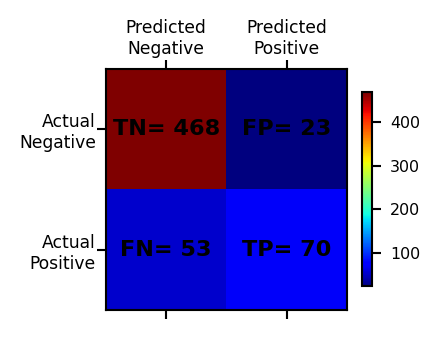

In [29]:
font = {'size'   : 6}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(4.5, 4.5), dpi= 190, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
Conf_Matrix(sgd_clf,X_train_Std,y_train,perfect=0,sdt=0,axt=ax1)

The first row element of the confusion matrix represents actual negative class (class 0): 468 negative classes are truly classified (True Negative (TN)=468): 23 negative class wrongly classified as positive (False Positive (FP)=23). The second row represents the actual positive class (class 1): 53 positive class were wrongly classified as negative (False Negative (FN)=53), while 70 were correctly classified as positive (True Positives (TP)=70). 

A perfect classifier should have only actual positives and actual negatives, so confusion matrix of a perfect classifier should be nonzero values only on diagonal elements (see figure):

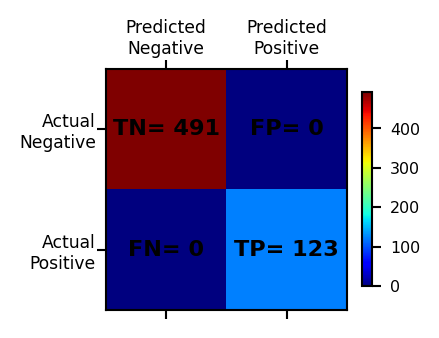

In [30]:
font = {'size'   : 6}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(4.5, 4.5), dpi= 190, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
Conf_Matrix(sgd_clf,X_train_Std,y_train,perfect=1,sdt=0,axt=ax1)
plt.show()

Although the confusion matrix represents a lot of information, sometimes more concise metric is preferred:

### Precision and Recall (Sensitivity)

**Precision** is calculated by $\frac{TP}{(TP+FP)}$ where TP is the number of true positives, and FP is the number of false positives. For example, for a medical test example, precision answers the following question: how many of those who we labeled as diabetic are actually diabetic?

**A naive way to have perfect precision is by making one single positive prediction and make sure that it is correct (precision = 1/1 = 100%).** However, this is not efficient approach to measure performance, since the classifier ignores all but one positive instance. For a medical test example, if 1 person is correctly positive diabetic (TP=1) and no people is wrongly labeled as negative (FP=0) so we have precision 1/1=100%. But wait!! what about those people are positive diabetic but wrongly labeled as negative (FN). So precision is typically used along with another metric named **recall**, also called **sensitivity** calculated by $\frac{TP}{(TP+FN)}$. Where TP is the number of true positives, and FN is the number of false negative. Again, for a medical test example, of all the people who are diabetic, how many of those we correctly predicted?

Although precision and sensitivity can be manually calculated, scikit-Learn have functions. Lets calculate these two metrics for Energy Efficiency dataset:

In [31]:
from sklearn.metrics import precision_score, recall_score

precision=precision_score(y_train, y_train_pred) # Precision= 84 / (84 + 34)
print('Precision= ',precision)

recall=recall_score(y_train, y_train_pred) # Precision= 84 / (84 + 39)
print('Recall (sensitivity)= ',recall)

Precision=  0.7526881720430108
Recall (sensitivity)=  0.5691056910569106


The calculated precision and recall are not satisfying and lower than accuracy. So, accuracy alone cannot be applied for a reliable performance measurement. For this example, precision means how many of predicted class 1 (positive) are actually class 1. Recall or Sensitivity means for all class 1 instances in data set, how many are correctly predicted as class 1.

The harmonic mean of precision and sensitivity could also be considered as another metric called F1- score:

$\large F_{1}=\frac{2}{\frac{1}{Precision}+\frac{1}{Sensitivity}}$

To calculate F1- score, f1_score() function of Scikit-Learn can be simply called: 

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.6481481481481481

F1- score gives much more weight to low values so a classifier only represents high harmonic mean if both precision and sensitivity are high. So classifiers with high F1 score should have similar precision and recall. 
However, this should not be always what you want: in some contexts precision is very important, and in other contexts
you recall is considered as first priority. For example, if you are training a classifier to detect safe videos for kids, you may prefer a classifier that rejects many
good videos (low sensitivity: high False Negative) but keeps only safe ones (high precision: very low False Positive), rather than a classifier with high sensitivity but allows very few inappropriate videos present in your product. 

On the other hand, if you are training a classifier for detecting shoplifters or thieves on surveillance images: it is should be absolutely fine if your classifier has only 30% precision (high False Positive) on condition that it has 99% sensitivity (very low False Negative). The security guards will get few false alerts; nothing happens; the security guards can apologize but it is important that almost all shoplifters will get caught [(Aurélien Géron, 2019)](
https://ucalgary-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=01UCALG_ALMA51737332320004336&context=L&vid=UCALGARY&lang=en_US&search_scope=EVERYTHING&adaptor=Local%20Search%20Engine&tab=everything&query=any,contains,Hands-On%20Machine%20Learning%20with%20Scikit-Learn%20%20Keras).

So, requiring high precision or sensitivity depends on a project expectation. Machine learning parameters should be tuned to have high required metrics or select an algorithm that has high required metrics.

# Multiclass Classification

We applied binary classifier that distinguishes between two classes, you should apply multiclass classifiers (multinomial classifiers) if you want to distinguish between more than two classes. Some Machine Learning algorithms are strictly designed for binary classification (Support Vector Machine); some classifiers (Random Forest) can handle multiple classes directly. However, there are different approaches you can apply multiclass classification using multiple binary classifiers. 

For example, the Energy Efficiency Dataset have also Multiclasses column for Heating Load: Level 1 to Level 4:

In [33]:
df_multi=df.copy()
df_multi[:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Binary Classes,Multi-Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Low Level,Level 2
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Low Level,Level 2
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Low Level,Level 2
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Low Level,Level 2
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Low Level,Level 2


In [34]:
# Percentage of each Class 
counts=df_multi['Multi-Classes'].value_counts()
counts
counts/len(df['Multi-Classes'])

Level 1    0.419271
Level 2    0.230469
Level 3    0.199219
Level 4    0.151042
Name: Multi-Classes, dtype: float64

In [35]:
# Mean of Heating Load for each Class
gb_mean=df_multi.groupby('Multi-Classes')['Heating Load'].mean()
gb_mean

Multi-Classes
Level 1    12.550994
Level 2    21.959266
Level 3    31.004510
Level 4    38.448534
Name: Heating Load, dtype: float64

Now use Scikit-learn's OrdinalEncoder function to convert Level 1 to level 4 classes from 0 to 3 numbers.

In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
Multi_Classes_encoded = ordinal_encoder.fit_transform(df_multi[['Multi-Classes']])
Multi_Classes_encoded[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [37]:
df_multi['Multi-Classes']=Multi_Classes_encoded
df_multi[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Binary Classes,Multi-Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Low Level,1.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Low Level,1.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Low Level,1.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Low Level,1.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Low Level,1.0


Lets see percentage of each number:

In [38]:
counts=df_multi['Multi-Classes'].value_counts()
counts
counts/len(df['Multi-Classes'])

0.0    0.419271
1.0    0.230469
2.0    0.199219
3.0    0.151042
Name: Multi-Classes, dtype: float64

One way to create a system that can classify the Energy Efficiency dataset into 4 classes (from 0 to 3) is to train 4 binary classifiers, one for each class (a 0-detector, a 1-detector, a 2-detector, and a 3-detector). For example, if you want to predict class 4, you should assign class 4 as 1 and other classes as 0. This process should be repeated for all classes. Then, you should find the most frequent class for each instances. This approach is called the **one-versus-all (OvA)**.

Training a binary classifier for every pair of digits is another strategy: one to distinguish 0 and 1 classes, another to distinguish 0 and 2 classes, another for 1 and 2 classes, and so on. This approach is called the **one-versus-one (OvO)**. You need to train $ \frac{n\times (n-1)}{2}$ classifiers for n classes. For the Energy Efficiency problem, we should train 6 binary classifiers. Imagine for 10 classes, you should have 45 classifiers to see which class is the most frequent for each instance!! This should be a lot of work. However, OvO strategy needs to be trained on the part of the training set for the two classes. This is the main advantage of OvO in case of large data set since it is faster to train many classifiers on small data set than training a few classifier on large training set. 

Scikit-Learn automatically runs OvA (except for SVM classifiers that uses OvO). It detects when you try to use a binary or multicalss classification [(Aurélien Géron, 2019)]().

Let’s use SGDClassifier. But we should remove unnecessary columns 'Heating Load', 'Binary Classes' from data.

In [39]:
df_multi.drop(['Heating Load','Binary Classes'], axis=1, inplace=True)
df_multi[0:5]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Multi-Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,1.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,1.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,1.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,1.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,1.0


In [40]:
# Shuffle data
np.random.seed(32) 
df_multi=df_multi.reindex(np.random.permutation(df_multi.index))
df_multi.reset_index(inplace=True, drop=True)
df_multi[0:10]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Multi-Classes
0,0.79,637.0,343.0,147.00,7.0,4,0.40,3,3.0
1,0.76,661.5,416.5,122.50,7.0,5,0.40,4,3.0
2,0.76,661.5,416.5,122.50,7.0,3,0.25,4,3.0
3,0.66,759.5,318.5,220.50,3.5,3,0.40,1,0.0
4,0.98,514.5,294.0,110.25,7.0,5,0.10,2,1.0
5,0.79,637.0,343.0,147.00,7.0,3,0.25,2,3.0
6,0.79,637.0,343.0,147.00,7.0,2,0.40,2,3.0
7,0.64,784.0,343.0,220.50,3.5,3,0.00,0,0.0
8,0.62,808.5,367.5,220.50,3.5,4,0.10,4,0.0
9,0.71,710.5,269.5,220.50,3.5,4,0.10,3,0.0


Divide data into training and test set using *StratifiedShuffleSplit* function to make sure we have a representative training and test set with the same percentage of classes.

In [41]:
# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spt.split(df_multi, df_multi['Multi-Classes']):
    train_set_strat = df_multi.loc[train_idx]
    test_set_strat  = df_multi.loc[test_idx]  

Plot histogram of classess for training and test set to make sure with have a corrected ratio of classes.

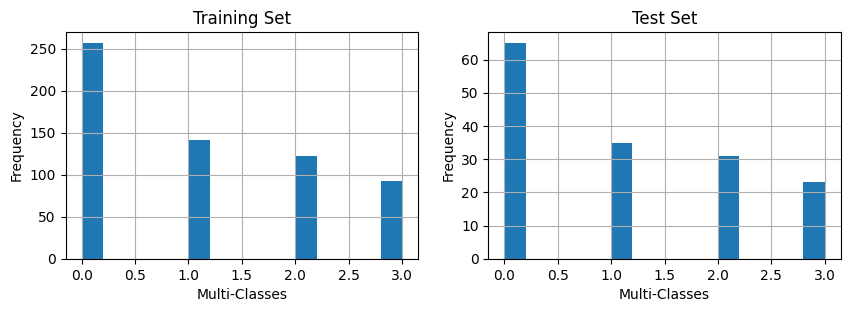

In [42]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1)
train_set_strat['Multi-Classes'].hist(bins=15)
plt.title("Training Set")
plt.xlabel("Multi-Classes")
plt.ylabel("Frequency")

ax2=plt.subplot(1,2,2) 
test_set_strat['Multi-Classes'].hist(bins=15)
plt.title("Test Set")
plt.xlabel("Multi-Classes")
plt.ylabel("Frequency")
plt.show()

Remove "Multi-Classes" column from data set and have it as separate column:

In [43]:
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("Multi-Classes", axis=1)
y_train = train_set_strat["Multi-Classes"].values

Next, standardize data with *StandardScaler* as we did before:

In [44]:
scaler = StandardScaler()
X_train=X_train.copy()
X_train_Std=scaler.fit_transform(X_train)
# Traning Data
X_train_Std[0:5]

array([[-0.96140194,  0.96917838, -0.0175156 ,  0.95730594, -0.98384385,
        -0.46588671,  0.09459275,  0.74302173],
       [-0.48764529,  0.41355231, -1.14957635,  0.95730594, -0.98384385,
         1.31638394,  0.09459275, -1.22342371],
       [ 0.55461935, -0.69769984, -0.0175156 , -0.67467698,  1.01642146,
         0.42524862, -1.04422981,  1.39850354],
       [ 0.55461935, -0.69769984, -0.0175156 , -0.67467698,  1.01642146,
         1.31638394,  1.23341532,  1.39850354],
       [-1.34040726,  1.52480446,  1.11454516,  0.95730594, -0.98384385,
         0.42524862,  1.23341532,  0.08753992]])

Now the data is ready for multiclass classification. Let’s use SGDClassifier:

In [45]:
# Call SGD classifier
sgd_clf = SGDClassifier(random_state=42,loss='log')

# Train SGD classifier
sgd_clf.fit(X_train_Std, y_train)

SGDClassifier(loss='log', random_state=42)

In [46]:
# Apply prediction for 10 data instances of training
sgd_clf.predict(X_train_Std[:10])

array([0., 0., 1., 3., 1., 2., 3., 0., 1., 2.])

In [47]:
#Lets look at real values (classes)
y_train[:10]

array([0., 0., 1., 2., 1., 2., 3., 1., 1., 1.])

This seems so simple! The code train the *SGDClassifier* on the training set using the target classes from 0 to 3.
If you want to know what is going on under the hood, Scikit-Learn trains 4 binary classifiers (OvA), gets the decision scores for each class, and selects the class with the highest score.

The following code calculates score values for each class from 0 to 3. The class with highest score is selected.

In [48]:
scores = sgd_clf.decision_function(X_train_Std[:1])
scores

array([[  5.86173707,  -4.23851446, -27.49715418, -19.67653238]])

In [49]:
print ('Predicted class: ', np.argmax(scores))

Predicted class:  0


predict_proba() function can be applied to get the probabilities that the classifier assigned to each instance for each class. SGDClassifier requires [log loss](https://towardsdatascience.com/log-loss-function-math-explained-5b83cd8d9c83) to predict probability of each class.

In [50]:
sgd_clf.predict_proba(X_train_Std[:1])

array([[9.85936344e-01, 1.40636532e-02, 1.13037077e-12, 2.81626693e-09]])

It is time to evaluate these classifiers. As always, you can use cross-validation to get a clean prediction. First we run class-validation to calculate accuracy. The following code is cross validation for 4-folds.

In [51]:
Accuracies=cross_val_score(sgd_clf,X_train_Std,y_train, cv=4, scoring="accuracy")
Accuracies

array([0.68831169, 0.66883117, 0.61437908, 0.68627451])

If you applied a random classifier, you get around 27% accuracy for each class; so this should not be a bad score at all, but you may be able to get better performance. 

In [52]:
Accuracy=cross_val_score(dmy_clf,X_train_Std,y_train, cv=4, scoring="accuracy")
Accuracy

array([0.27272727, 0.27272727, 0.33333333, 0.2745098 ])

## Error Analysis for Multiclass Classification

We applied confusion matrix for binary classification. Confusion matrix can also be applied for error analysis of multiclass classification. You first need to make clean predictions using the *cross_val_predict()* function, then call *confusion_matrix()* function to calculate confusion matrix as we did earlier:

In [53]:
y_train_pred = cross_val_predict(sgd_clf,X_train_Std,y_train, cv=4)
confmx=confusion_matrix(y_train, y_train_pred)
confmx

array([[238,  19,   0,   0],
       [ 34,  62,  38,   8],
       [  0,  46,  48,  28],
       [  0,  18,  15,  60]], dtype=int64)

It is better to look at the confusion matrix plot:

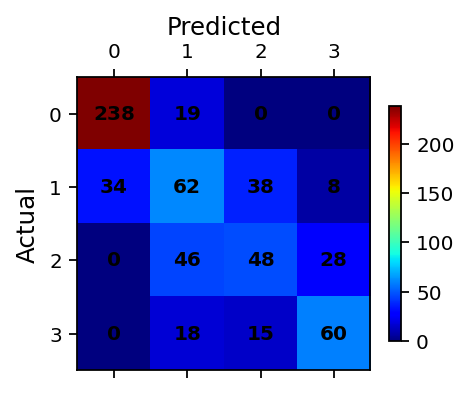

In [54]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(6.5, 6.5), dpi= 160, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
Conf_Matrix(sgd_clf,X_train_Std,y_train,perfect=0,sdt=0,axt=ax1)
plt.ylabel("Actual",fontsize=11)
plt.title("Predicted",y=1.1,fontsize=11)

plt.show()

This confusion matrix does not looks very good, since there are a lot of missclassified class. Only class 0 has the highest accuracy since it has dark blue cells (zero values) on off-diagonal. Let see how a perfect classifier looks like

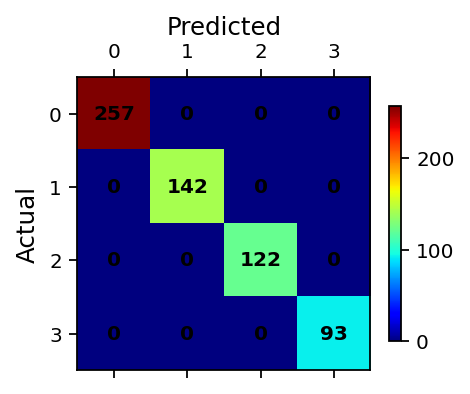

In [55]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(6.5, 6.5), dpi= 160, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
Conf_Matrix(sgd_clf,X_train_Std,y_train,perfect=1,sdt=0,axt=ax1)
plt.ylabel("Actual",fontsize=11)
plt.title("Predicted",y=1.1,fontsize=11)

plt.show()

A perfect classifier should have zero on off-diagonal elements. 

Lets make error plot. Each value in the confusion matrix should be divided by the number of classes in the corresponding class:

In [56]:
row_sums = confmx.sum(axis=1, keepdims=True)
norm_confmx = confmx / row_sums
norm_confmx

array([[0.92607004, 0.07392996, 0.        , 0.        ],
       [0.23943662, 0.43661972, 0.26760563, 0.05633803],
       [0.        , 0.37704918, 0.39344262, 0.2295082 ],
       [0.        , 0.19354839, 0.16129032, 0.64516129]])

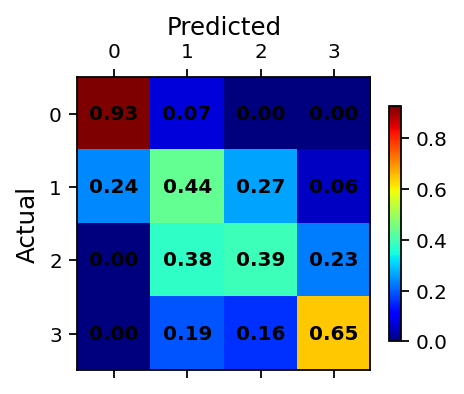

In [57]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(6.5, 6.5), dpi= 160, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
Conf_Matrix(sgd_clf,X_train_Std,y_train,perfect=0,sdt=1,axt=ax1)
plt.ylabel("Actual",fontsize=11)
plt.title("Predicted",y=1.1,fontsize=11)
plt.show()

Now the plot clearly shows the kinds of errors the classifier makes. Class 2 (Level 3) is the worst prediction: get 38% misclassified as CLass 1 and 23% miss\classified as Class 3. Class 0, is the best prediction; only 7% misclassified as Class 1. The confusion matrix is not necessarily symmetrical. 